In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from clean_data import clean_text
import time
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Adjust the path to the project root (assuming the notebook is two levels deep in the folder structure)
project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))

# Add the project root to the Python path
sys.path.append(project_root)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MCA01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MCA01\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Carregar e Pré-processar o Dataset

In [2]:
# Carregar o dataset
csv_path = os.path.abspath(os.path.join(current_dir, '..', '..', 'datasets', 'trainEN.csv'))

df = pd.read_csv(csv_path)
# Combinar colunas de título e texto
df['combined_text'] = df['title'] + " " + df['text']
df['clean_text'] = df['combined_text'].apply(clean_text)
df.head()

,id,title,author,text,label,combined_text,clean_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,house dem aide didnt even see comeys letter ja...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",flynn hillary clinton big woman campus breitba...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...,truth might get fired truth might get fired oc...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,15 civilian killed single u airstrike identifi...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,iranian woman jailed fictional unpublished sto...


## Vetorização dos Textos

In [3]:
# Vetorizar o dataset
#vectorizer = TfidfVectorizer(max_features=5000, min_df=3, max_df=0.7, ngram_range=(1, 2))
X = df['clean_text']
y = df['label']

# Exibir a forma da matriz resultante
X.shape

(20166,)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [5]:
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000, min_df=3, max_df=0.7, ngram_range=(1, 2))

In [6]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [10]:
from sklearn.decomposition import TruncatedSVD
#from sklearn.svm import LinearSVC

# Initialize the LinearSVC model and the PCA transformer
#clf = LinearSVC(C=0.01)
clf = SVC(C=109.911, gamma=5.001,kernel='rbf')
pca = TruncatedSVD(n_components=150)

# Transform the training data
X_train2 = pca.fit_transform(X_train_vectorized)

# Transform the test data
X_test2 = pca.transform(X_test_vectorized)

# Fit the model on the transformed training data
clf.fit(X_train2, y_train)

# Score the model on the transformed test data
score = clf.score(X_test2, y_test)
print("Model accuracy:", score)

Model accuracy: 0.9573553719008264


ValueError: Filler values must be provided when X has more than 2 training features.

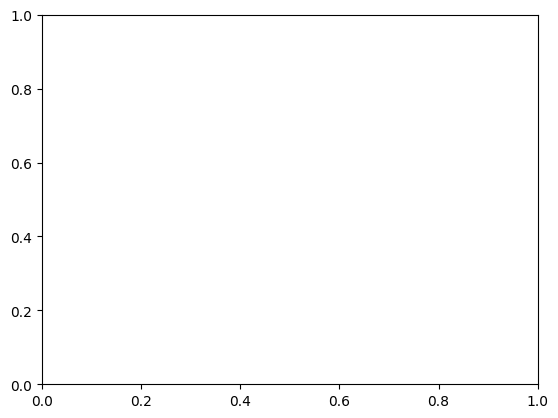

In [12]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


plot_decision_regions(X_train2, y_train.to_numpy(), clf=clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()